<a href="https://colab.research.google.com/github/ashraf-abdalghani/mycolab/blob/main/Stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
 <h1> Stock prices - Time Series Analysis </h1>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0_81P1i8Io7Wty5DMrNH-7qPA5ZgEKDUaww&s" alt="Titanic" width="500" height="200">

</center>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
data = yf.download('AAPL',start='2019-01-01',end='2023-12-31')
data.head()

/tmp/ipython-input-155005507.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL',start='2019-01-01',end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.617851,37.839387,36.738862,36.896080,148158800
2019-01-03,33.870838,34.711713,33.825578,34.297229,365248800
2019-01-04,35.316750,35.385832,34.254343,34.428234,234428400
2019-01-07,35.238152,35.452541,34.754589,35.421573,219111200
2019-01-08,35.909889,36.164774,35.378686,35.626421,164101200


In [12]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (High, AAPL)    1258 non-null   float64
 2   (Low, AAPL)     1258 non-null   float64
 3   (Open, AAPL)    1258 non-null   float64
 4   (Volume, AAPL)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [10]:
# إعادة تعيين الفهرس وتحويل المستويات إلى أعمدة
data_clean = data.reset_index()
data_clean.columns = ['Date', 'Close', 'High', 'Low','Open','Volume']  # تسمية الأعمدة الجديدة
data_clean.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,37.617851,37.839387,36.738862,36.896080,148158800
1,2019-01-03,33.870838,34.711713,33.825578,34.297229,365248800
2,2019-01-04,35.316750,35.385832,34.254343,34.428234,234428400
3,2019-01-07,35.238152,35.452541,34.754589,35.421573,219111200
4,2019-01-08,35.909889,36.164774,35.378686,35.626421,164101200


In [14]:
data_clean.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

# : رسم سعر الإغلاق مع التاريخ

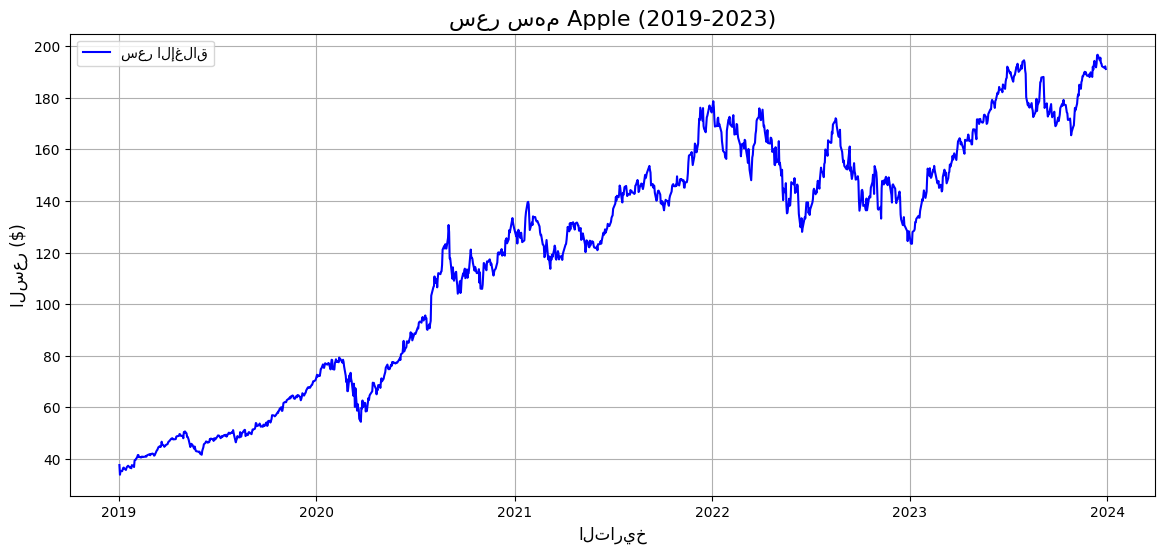

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(data_clean['Date'], data_clean['Close'], color='blue', label='سعر الإغلاق')
plt.title('سعر سهم Apple (2019-2023)', fontsize=16)
plt.xlabel('التاريخ', fontsize=12)
plt.ylabel('السعر ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# حساب المتوسط المتحرك لـ 50 يوم (MA50):

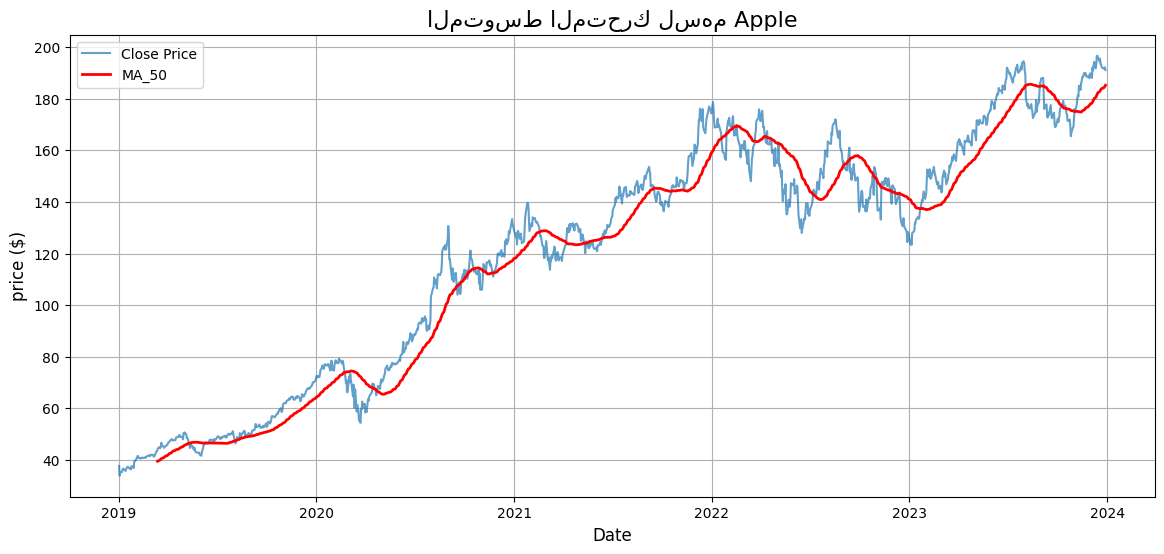

In [32]:
data_clean['MA_50']=data_clean['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 6))
plt.plot(data_clean['Date'], data_clean['Close'],label="Close Price",alpha=0.7)
plt.plot(data_clean['Date'],data_clean['MA_50'],label="MA_50",color='red',linewidth=2)
plt.title('المتوسط المتحرك لسهم Apple', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('price ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# حساب التغير اليومي (Daily Return %):

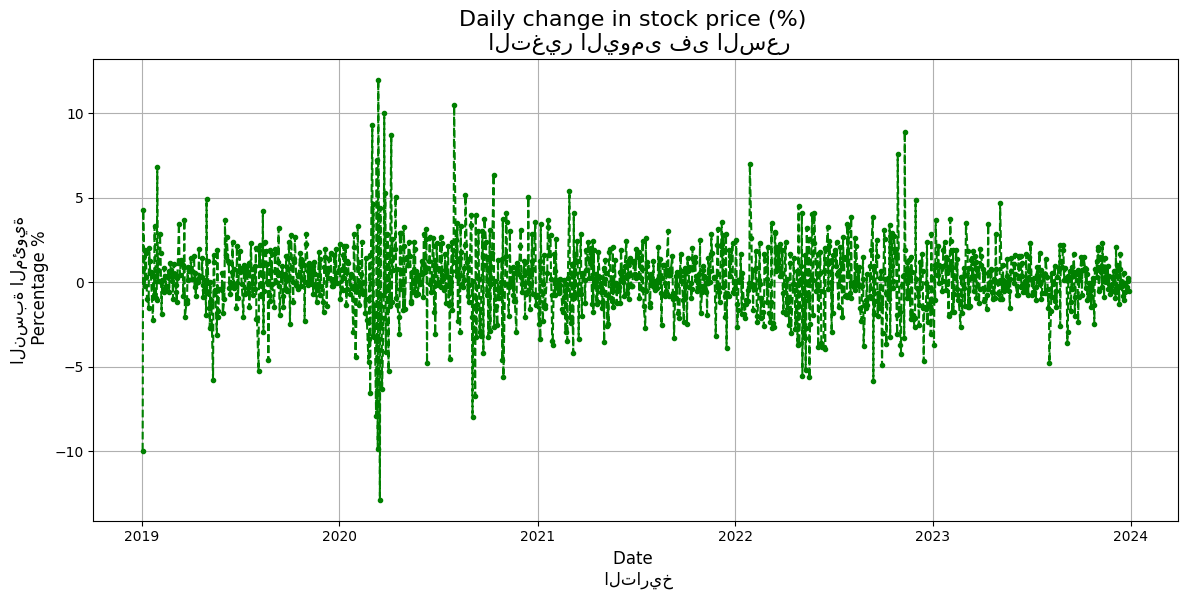

In [38]:
data_clean['Daily_Return'] = data_clean['Close'].pct_change() * 100  # التغير كنسبة مئوية

plt.figure(figsize=(14, 6))
plt.plot(data_clean['Date'], data_clean['Daily_Return'], color='green', linestyle='--', marker='o', markersize=3)
plt.title('Daily change in stock price (%) \n التغير اليومى فى السعر', fontsize=16)
plt.xlabel('Date \n التاريخ', fontsize=12)
plt.ylabel('النسبة المئوية\n Percentage %', fontsize=12)
plt.grid(True)
plt.show()

#  تحليل العلاقة بين السعر وحجم التداول (Volume):

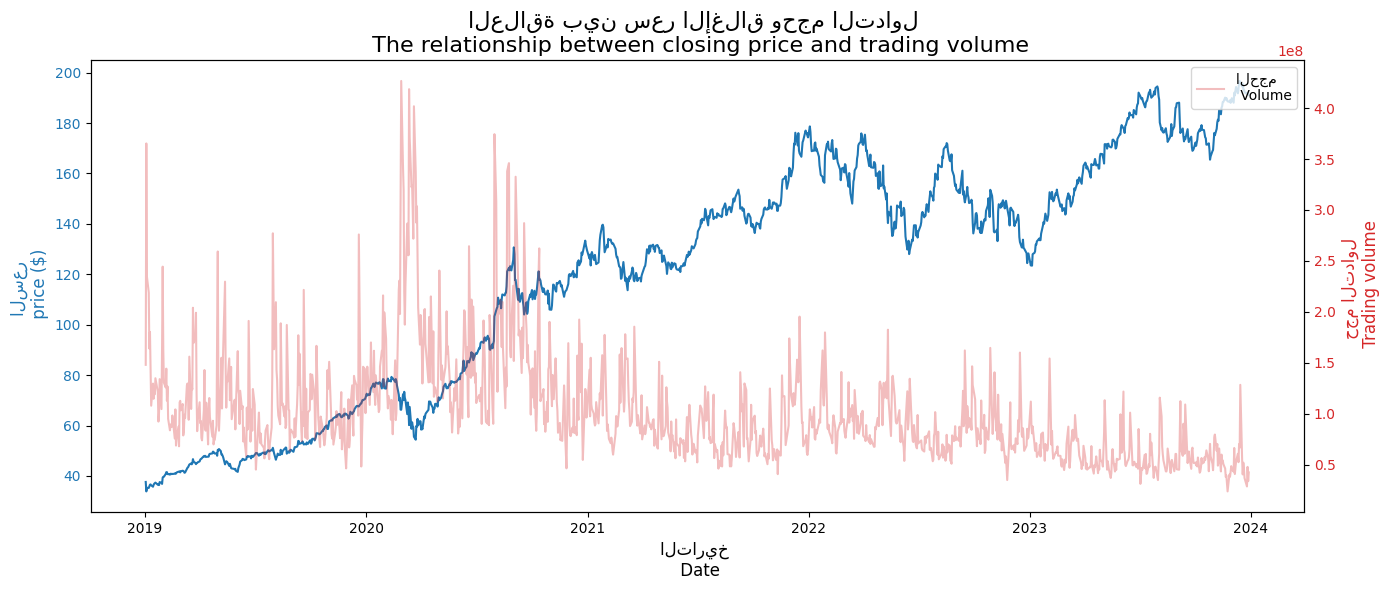

In [44]:
# إنشاء subplot بمحورين مختلفين (للسعر والحجم)
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('التاريخ \n Date', fontsize=12)
ax1.set_ylabel('السعر \n price ($)', color=color, fontsize=12)
ax1.plot(data_clean['Date'], data_clean['Close'], color=color, label='السعر \n price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # إنشاء محور ثانٍ بنفس المحور X
color = 'tab:red'
ax2.set_ylabel('حجم التداول \n Trading volume', color=color, fontsize=12)
ax2.plot(data_clean['Date'], data_clean['Volume'], color=color, label='الحجم \n Volume', alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('العلاقة بين سعر الإغلاق وحجم التداول \n The relationship between closing price and trading volume', fontsize=16)
fig.tight_layout()
plt.legend()
plt.show()

# تحليل أعلى/أقل سعر (High/Low):

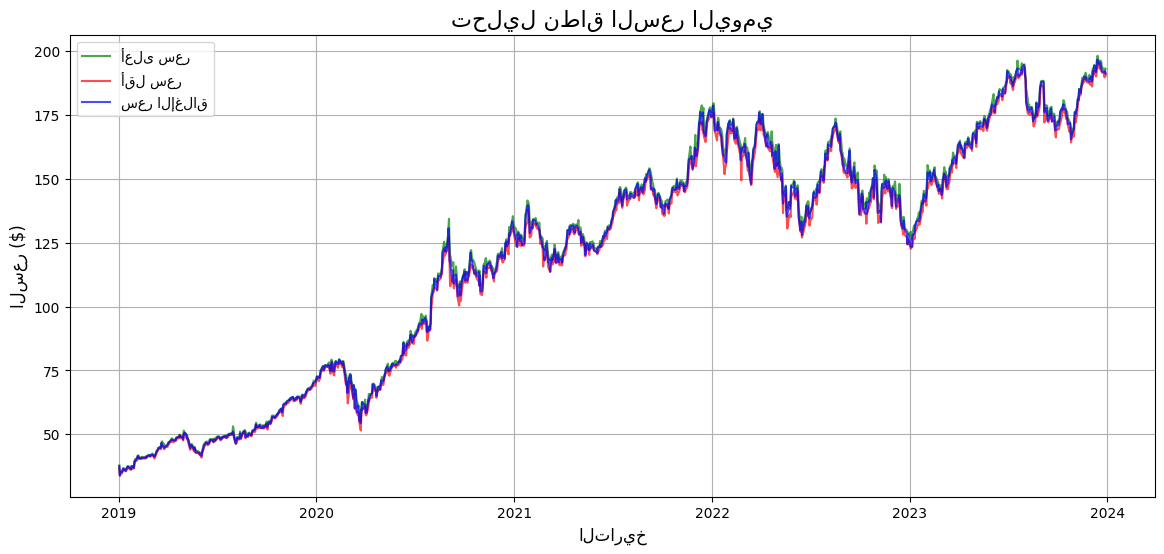

In [46]:
plt.figure(figsize=(14, 6))
plt.plot(data_clean['Date'], data_clean['High'], label='أعلى سعر', color='green', alpha=0.7)
plt.plot(data_clean['Date'], data_clean['Low'], label='أقل سعر', color='red', alpha=0.7)
plt.plot(data_clean['Date'], data_clean['Close'], label='سعر الإغلاق', color='blue', alpha=0.7)
plt.title('تحليل نطاق السعر اليومي', fontsize=16)
plt.xlabel('التاريخ', fontsize=12)
plt.ylabel('السعر ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# حساب التقلب (Volatility):

In [49]:
# حساب التقلب السنوي (Annualized Volatility)
daily_volatility = data_clean['Daily_Return'].std()
annual_volatility = daily_volatility * np.sqrt(252)  # 252 يوم تداول في السنة

print(f"التقلب اليومي: {daily_volatility:.2f}%")
print(f"التقلب السنوي: {annual_volatility:.2f}%")

التقلب اليومي: 2.03%
التقلب السنوي: 32.23%


In [52]:
data_clean.to_csv('AAPL_analyzed.csv', index=False)
data_clean.to_excel('AAPL_analyzed.xlsx', index=False)

# بونص: تحليل الموسمية (Seasonality)

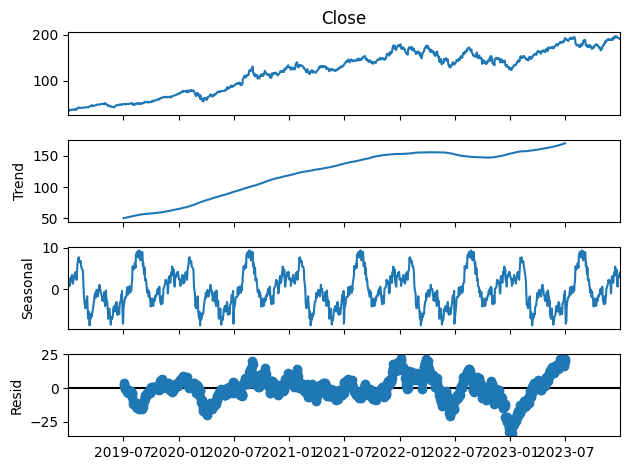

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# يجب أن يكون التاريخ هو Index
data_temp = data_clean.set_index('Date')
result = seasonal_decompose(data_temp['Close'], model='additive', period=252)  # 252 يوم تداول/سنة
result.plot()
plt.show()